In [2]:
import os
import sys

# Add the path to the directory containing your project to the Python path
project_path = '/home/ted/Desktop/DEV/telecom-user-behavior-analysis'
sys.path.append(project_path)

import pandas as pd
from DB_connection.connection import PostgresConnection
from src.utils import missing_values_table, convert_bytes_to_megabytes

# Change the current working directory to the project directory
os.chdir(project_path)

Connected to PostgreSQL database!
      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...         

In [3]:
# Connect to the PostgreSQL database
db = PostgresConnection(dbname='postgres_db', user='postgres_username', password='postgres_password')
db.connect()

# Execute query to retrieve data
query = "SELECT * FROM xdr_data"
result = db.execute_query(query)

# Convert result to Pandas DataFrame
df = pd.DataFrame(result, columns=[desc[0] for desc in db.cursor.description])
print(df.head())  # Display the first few rows of the DataFrame

# Close the database connection
db.close_connection()

Connected to PostgreSQL database!
      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...         

In [4]:
# Perform initial data analysis
missing_values_df = missing_values_table(df)
print("Missing Values in df:")
print(missing_values_df)

Your selected dataframe has 55 columns.
There are 41 columns that have missing values.
Missing Values in df:
                                          Missing Values  % of Total Values  \
Nb of sec with 37500B < Vol UL                    130254               86.8   
Nb of sec with 6250B < Vol UL < 37500B            111843               74.6   
Nb of sec with 125000B < Vol DL                    97538               65.0   
TCP UL Retrans. Vol (Bytes)                        96649               64.4   
Nb of sec with 31250B < Vol DL < 125000B           93586               62.4   
Nb of sec with 1250B < Vol UL < 6250B              92894               61.9   
Nb of sec with 6250B < Vol DL < 31250B             88317               58.9   
TCP DL Retrans. Vol (Bytes)                        88146               58.8   
HTTP UL (Bytes)                                    81810               54.5   
HTTP DL (Bytes)                                    81474               54.3   
Avg RTT DL (ms)       

In [5]:
df['HTTP DL (MB)'] = convert_bytes_to_megabytes(df, 'HTTP DL (Bytes)')

print(df.head())

      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube UL (Bytes)  Netflix DL (Bytes)  \
0  9.16456699548519E+015  ...           2501332.0           8198936.0   
1                L77566A  ...          19111729.0          18338413.0   

In [28]:
#Aggregating the engagement metrics per customer ID (MSISDN)
# Calculate session frequency per customer
session_frequency = df.groupby('MSISDN/Number')['Bearer Id'].count().reset_index()
session_frequency.columns = ['MSISDN/Number', 'Session Frequency']

# Calculate session duration per customer
session_duration = df.groupby('MSISDN/Number')['Dur. (ms)'].sum().reset_index()
session_duration['Session Duration (s)'] = session_duration['Dur. (ms)'] / 1000  # Convert milliseconds to seconds
session_duration.drop(columns=['Dur. (ms)'], inplace=True)

# Calculate session total traffic per customer
session_total_traffic = df.groupby('MSISDN/Number')[['Total DL (Bytes)', 'Total UL (Bytes)']].sum().reset_index()
session_total_traffic['Session Total Traffic (Bytes)'] = session_total_traffic['Total DL (Bytes)'] + session_total_traffic['Total UL (Bytes)']
session_total_traffic.drop(columns=['Total DL (Bytes)', 'Total UL (Bytes)'], inplace=True)

# Merge the metrics into a single DataFrame
customer_engagement_metrics = session_frequency.merge(session_duration, on='MSISDN/Number').merge(session_total_traffic, on='MSISDN/Number')
print(customer_engagement_metrics)

# Report the top 10 customers for each engagement metric
top_10_session_frequency = customer_engagement_metrics.nlargest(10, 'Session Frequency')
top_10_session_duration = customer_engagement_metrics.nlargest(10, 'Session Duration (s)')
top_10_session_total_traffic = customer_engagement_metrics.nlargest(10, 'Session Total Traffic (Bytes)')

print("Top 10 Customers by Session Frequency:")
print(top_10_session_frequency)
print("\nTop 10 Customers by Session Duration:")
print(top_10_session_duration)
print("\nTop 10 Customers by Session Total Traffic:")
print(top_10_session_total_traffic)


        MSISDN/Number  Session Frequency  Session Duration (s)  \
0        3.360100e+10                  1               116.720   
1        3.360100e+10                  1               181.230   
2        3.360100e+10                  1               134.969   
3        3.360101e+10                  1                49.878   
4        3.360101e+10                  2                37.104   
...               ...                ...                   ...   
106851   3.379000e+10                  1                 8.810   
106852   3.379000e+10                  1               140.988   
106853   3.197021e+12                  1               877.385   
106854   3.370000e+14                  1               253.030   
106855   8.823971e+14                  1               869.844   

        Session Total Traffic (Bytes)  
0                        8.786906e+08  
1                        1.568596e+08  
2                        5.959665e+08  
3                        4.223207e+08  
4      

In [34]:
from sklearn.preprocessing import MinMaxScaler

# Select the engagement metrics for normalization
engagement_data = customer_engagement_metrics[['Session Frequency', 'Session Duration (s)', 'Session Total Traffic (Bytes)']]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the engagement metrics
normalized_engagement_data = scaler.fit_transform(engagement_data)

# Print the normalized engagement data
print(normalized_engagement_data)


[[0.05555556 0.00590825 0.09593143]
 [0.05555556 0.00938651 0.01402598]
 [0.05555556 0.0068922  0.06385101]
 ...
 [0.05555556 0.04692194 0.02256615]
 [0.05555556 0.01325784 0.06388747]
 [0.05555556 0.04651534 0.0120169 ]]


In [35]:
from sklearn.cluster import KMeans

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(normalized_engagement_data)

# Add cluster labels to the engagement metrics DataFrame
customer_engagement_metrics['Cluster'] = cluster_labels

# Compute the non-normalized metrics for each cluster
cluster_metrics = customer_engagement_metrics.groupby('Cluster').agg({
    'Session Frequency': ['min', 'max', 'mean', 'sum'],
    'Session Duration (s)': ['min', 'max', 'mean', 'sum'],
    'Session Total Traffic (Bytes)': ['min', 'max', 'mean', 'sum']
})

# Print the cluster metrics
print(cluster_metrics)


        Session Frequency                      Session Duration (s)  \
                      min max      mean    sum                  min   
Cluster                                                               
0                       1   4  2.184791  46228               18.235   
1                       3  18  4.258194  17020               49.323   
2                       0   2  1.043550  85258                7.142   

                                            Session Total Traffic (Bytes)  \
               max        mean          sum                           min   
Cluster                                                                     
0         3174.824  215.100806  4551317.959                  2.842182e+08   
1        18553.754  572.159112  2286919.971                  1.085994e+09   
2         1573.420  107.473681  8780599.726                  3.324901e+07   

                                                   
                  max          mean           sum  
Cluste

In [36]:
#Aggregating user total traffic per application

# Calculate total traffic per application per user
app_traffic_per_user = df.groupby('MSISDN/Number')[['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                                                    'Google DL (Bytes)', 'Google UL (Bytes)',
                                                    'Email DL (Bytes)', 'Email UL (Bytes)',
                                                    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
                                                    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                                                    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
                                                    'Other DL (Bytes)', 'Other UL (Bytes)']].sum()

# Summarize total traffic for each application across all users
total_traffic_per_app = app_traffic_per_user.sum()

# Rank users based on total traffic for each application
ranked_users_per_app = app_traffic_per_user.rank(ascending=False, axis=0)

# Select top 10 users with highest total traffic for each application
top_10_users_per_app = {}
for app in app_traffic_per_user.columns:
    top_10_users_per_app[app] = app_traffic_per_user.nlargest(10, app)

# Print the top 10 users per application
for app, top_users in top_10_users_per_app.items():
    print(f"Top 10 users for {app}:")
    print(top_users)
    print("\n")


Top 10 users for Social Media DL (Bytes):
               Social Media DL (Bytes)  Social Media UL (Bytes)  \
MSISDN/Number                                                     
3.362632e+10                42743837.0                 630942.0   
3.376054e+10                39297646.0                 485543.0   
3.365973e+10                34900444.0                 511914.0   
3.361489e+10                27749744.0                 544800.0   
3.362578e+10                26564121.0                 571379.0   
3.366716e+10                23753753.0                 494097.0   
3.378632e+10                23568655.0                 406264.0   
3.366907e+10                23477047.0                 323787.0   
3.360313e+10                22776679.0                 301146.0   
3.365849e+10                22695673.0                 304393.0   

               Google DL (Bytes)  Google UL (Bytes)  Email DL (Bytes)  \
MSISDN/Number                                                           
3.36263

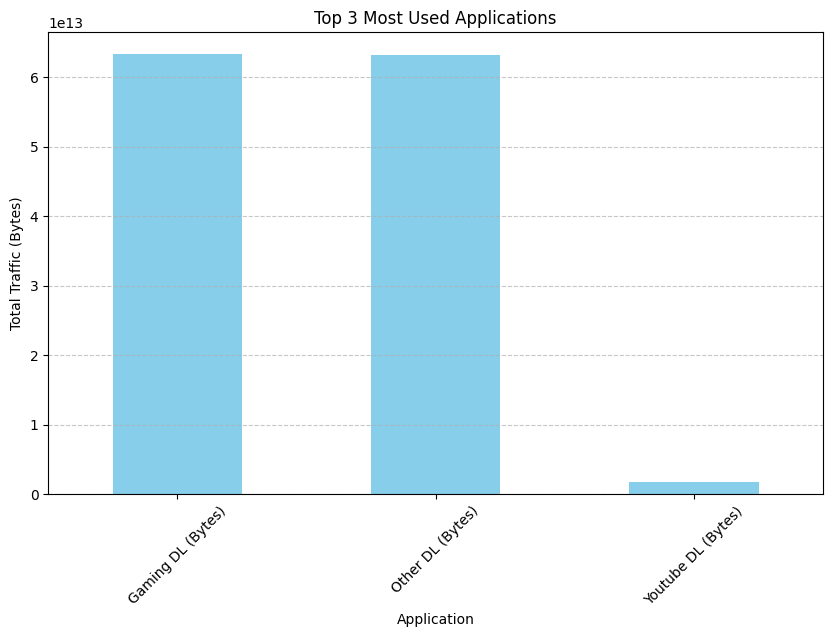

In [38]:
#Plotting the top 3 most used applications
import matplotlib.pyplot as plt

# Calculate the total traffic for each application
total_traffic_per_app = df[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
                            'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)',
                            'Other DL (Bytes)']].sum()

# Select the top 3 most used applications
top_3_apps = total_traffic_per_app.nlargest(3)

# Plotting
plt.figure(figsize=(10, 6))
top_3_apps.plot(kind='bar', color='skyblue')
plt.title('Top 3 Most Used Applications')
plt.xlabel('Application')
plt.ylabel('Total Traffic (Bytes)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


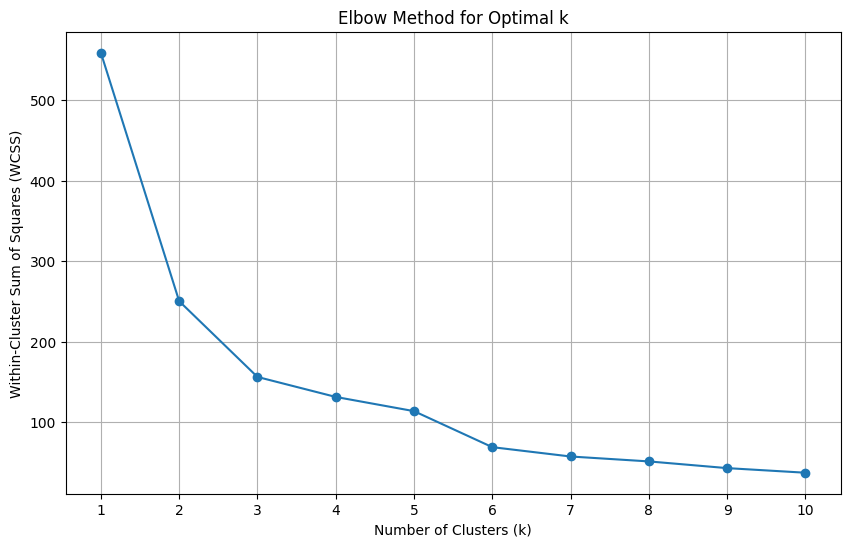

In [39]:
#determining the optimized value of k
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Define the range of k values to test
k_values = range(1, 11)

# Initialize list to store the within-cluster sum of squares (WCSS) for each k
wcss = []

# Calculate WCSS for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_engagement_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.grid(True)
plt.show()
